In [1]:
import pandas as pd
import numpy
import numpy as np
user_movie = numpy.loadtxt(open("F:/Soton/Project/dataset/ml-latest-small/ratings.csv","rb"), delimiter=",",skiprows=1) 
df = pd.read_csv('F:/Soton/Project/dataset/ml-latest-small/ratings.csv', header=0)
movie_df = pd.read_csv('F:/Soton/Project/dataset/ml-latest-small/movies.csv', header=0)

#data_set 20MB
#unames = ['user_id', 'movie_id', 'rating', 'timestamp']
#users = pd.read_table('F:/Soton/Project/dataset/ml-20m/ratings.csv', sep=',', header=0, names=unames)
#mnames = ['movie_id', 'title', 'genres']
#movies = pd.read_table('F:/Soton/Project/dataset/ml-20m/movies.csv', sep=',', header=0, names=mnames)

#data_set for edu
unames = ['user_id', 'movie_id', 'rating', 'timestamp']
users = pd.read_table('F:/Soton/Project/dataset/ml-latest-small/ratings.csv', sep=',', header=0, names=unames)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('F:/Soton/Project/dataset/ml-latest-small/movies.csv', sep=',', header=0, names=mnames)
data = pd.merge(users, movies)
len(data)

100004

In [27]:
#Merged data frame structure
data[:10]

,user_id,movie_id,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
42,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
84,1,1061,3.0,1260759182,Sleepers (1996),Thriller
117,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
165,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
211,1,1263,2.0,1260759151,"Deer Hunter, The (1978)",Drama|War
259,1,1287,2.0,1260759187,Ben-Hur (1959),Action|Adventure|Drama
305,1,1293,2.0,1260759148,Gandhi (1982),Drama
351,1,1339,3.5,1260759125,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller
403,1,1343,2.0,1260759131,Cape Fear (1991),Thriller


In [2]:
user_id_list = list(set(data['user_id']))
avv = []
for i in user_id_list:
    t = data[data['user_id']==i]
    avv.append(len(t))
sum(avv)/len(avv)

149.03725782414307

In [3]:
#data set split
train_data = None
test_data = None
user_id_list = list(set(data['user_id']))
for i in user_id_list:
    data_list = data[data['user_id']==i]
    total = len(data_list)
    l1 = int(total*0.8)
    train = data_list[:l1]
    test = data_list[l1:]
    train_data = pd.concat([train_data, train])
    test_data = pd.concat([test_data, test])

In [4]:
data = train_data

In [4]:
train_data[train_data['movie_id']==8195]

,user_id,movie_id,rating,timestamp,title,genres
69729,23,8195,3.0,1148672148,"Avventura, L' (Adventure, The) (1960)",Drama|Mystery|Romance
69730,262,8195,2.5,1433899743,"Avventura, L' (Adventure, The) (1960)",Drama|Mystery|Romance


In [5]:
#test data set to dataframe
movie_list_test = []
for i in user_id_list:
    e = list(test_data[test_data['user_id']==i]['movie_id'])
    movie_list_test.append(e)
test_dic = dict(zip(user_id_list, movie_list_test))

In [5]:
record = data[(data['user_id']==1) & (data['movie_id']==31)]
rate = record['rating']
user_id_list = list(set(data['user_id']))
movie_id_list = list(set(data['movie_id']))
len(movie_id_list)

4931

In [6]:
#user similarity 
def pearson(user1, user2):
    non01 = []
    non02 = []
    common = []
    rating1 = []
    rating2 = []
    for i, value in enumerate(user1):
        if value != 0:
            non01.append(i)
    for j, value in enumerate(user2):
        if value != 0:
            non02.append(j)
    #print(non01)
    #print(non02)
    for a in non01:
        for b in non02:
            if a==b:
                common.append(a)
    #print(common)
    #common
    if not common:
        return
    for c in common:
        rating1.append(user1[c])
        rating2.append(user2[c])
    #print(rating1)
    #print(rating2)
    non0rate1 = []
    non0rate2 = []
    for x in non01:
        non0rate1.append(user1[x])
    for y in non02:
        non0rate2.append(user2[y])
    av1 = sum(non0rate1)/len(non0rate1)
    av2 = sum(non0rate2)/len(non0rate2)
    #print(av1)
    #print(av2)
    num = []
    deno1 = []
    deno2 = []
    for x,y  in zip(rating1, rating2):
        num.append((x-av1)*(y-av2))
        deno1.append((x-av1)**2)
        deno2.append((y-av2)**2)
    
    sim = sum(num)/((sum(deno1)**(1/2))*(sum(deno2)**(1/2)))
    return sim

In [16]:
def get_avg(user_id):
    record = data[data['user_id']==user_id]
    rates = list(record['rating'])
    return sum(rates)/len(rates)

#Prediction, generate items
def predict(user_id, movie_id, k):
    #find nn
    similarity = []
    k = k-1
    for u in range(1,601):
        user = list(data[data['user_id']==user_id]['rating'])
        u_each = list(data[data['user_id']==u]['rating'])
        similarity.append(pearson(user, u_each))
    nbs = {}
    u_id = []
    simi = []
    for uid, sim in enumerate(similarity):
        u_id.append(uid+1)
        simi.append(sim)
    nbs = dict(zip(u_id, simi))
    nbs_simi = sorted(nbs.items(), key=lambda d:d[1], reverse = True)
    nbs_simi = dict(nbs_simi)
    nbs_simi_k = dict(zip(list(nbs_simi.keys())[:k], list(nbs_simi.values())[:k]))
    fenzi = []
    fenmu = []
    for i in list(nbs_simi_k.keys()):
        avg = get_avg(i)
        record = data[(data['user_id']==i) & (data['movie_id']==movie_id)]
        if float(sum(list(record['rating']))) != 0:
            sim_rate = nbs_simi_k[i]*(float(sum(list(record['rating'])))-avg)
            fenzi.append(sim_rate)
            fenmu.append(nbs_simi_k[i])
    avg_user = get_avg(user_id)
    #print(avg_user)
    if sum(fenmu)==0:
        return avg_user
    else:
        res = avg_user + float(sum(fenzi))/float(sum(fenmu))
    return res

pred = predict(1, 8195, 50)
pred

2.65625

In [30]:
#item-attribute
film_type = [ 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movie_attr = pd.DataFrame(np.zeros((len(movie_id_list), len(film_type))), index=movie_id_list, columns=film_type)    
for i in movie_id_list:
    movie = data[data['movie_id']==i]
    attr = list(movie['genres'])[0].split('|')
    for t in attr:
        movie_attr.loc[i, t] = 1
#转换为numpy矩阵
#movie_attr = movie_attr.values
movie_attr[:10]

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
#For each attribute
def get_fav_value(user_id, attr):
    record = data[data['user_id']==user_id]
    movie_list = list(record['movie_id'])
    it = []
    for m in movie_list:
        rate = record[record['movie_id']==m]['rating']
        iak = movie_attr.loc[m, attr]
        mult = float(rate)*float(iak)
        it.append(mult)
    res = sum(it)
    return res
#for all attributes
def get_total_fav(user_id):
    res = []
    for att in film_type:
        res.append(get_fav_value(user_id, att))
    return sum(res)
#Preference value
def pref_para(user_id, attr):
    p = get_fav_value(user_id, attr)/get_total_fav(user_id)
    return p

#User interest
def user_interest(user_id, movie_id):
    movie = data[data['movie_id']==movie_id]
    attr = list(movie['genres'])[0].split('|')
    interest = []
    for a in attr:
        p = pref_para(user_id, a)
        interest.append(p)
    return sum(interest)

#Prediction new
def predict2(user_id, movie_id, beta, k):
    p1 = predict(user_id, movie_id, k)
    p2 = user_interest(user_id, movie_id)
    #print(p1)
    #print(p2)
    pred = beta * p1+ (1-beta) * p2
    return pred

In [15]:
def rec_test(user_id, n):
    for m in movie_id_list:
        recd.append(predict2(user_id, m, 0.6))
    rec_list = {}
    rec_list = dict(zip(movie_id_list, recd))
    rec_list_sort = sorted(rec_list.items(), key=lambda d:d[1], reverse = True)
    res = rec_list_sort[:n]
    return res

def get_precision(rec_list, user_id):
    c=0
    record = list(test_data[test_data['user_id']==user_id])
    for m in rec_list:
        for n in record:
            if m==n:
                c = c+1
    return c/len(rec_list)

def get_recall(rec_list, user_id):
    c=0
    record = list(test_data[test_data['user_id']==user_id])
    for m in rec_list:
        for n in record:
            if m==n:
                c = c+1
    return c/len(record)

def res_test(a, k, n):
    all_rec_list = {}
    res_id=[]
    res_movie=[]
    n=n-1
    for i in user_id_list:
        print(i)
        pre=[]
        record = test_data[test_data['user_id']==i]
        record_train = train_data[train_data['user_id']==1]
        m_i = list(record_train['movie_id'])
        movies = list(record['movie_id'])
        movies = [w for w in movies if w not in m_i]
        for m in movies:
            pre.append(predict2(i, m, a, k))
        rec_list = dict(zip(movies, pre))
        rec_list_sort = sorted(rec_list.items(), key=lambda d:d[1], reverse = True)
        result = list(dict(rec_list_sort).keys())
        result_top = result[:n]
        res_id.append(i)
        res_movie.append(result_top)
    all_rec_list=dict(zip(res_id, res_movie))
    precision = []
    for u,m in all_rec_list.items():
        precision.append(get_precison(m, u))
    f_precision=sum(precision)/len(user_id_list)
    return f_precision
pre_list1=[]
pre_list2=[]
pre_list3=[]
pre_list4=[]
alpha = [0.1,0.2,0.3,0.4,.0.5,0.6,0.7,0.8,0.9,1]
# k=30
for a in alpha:
    pre_list1.append(res_test(a, 30, 30))
#k=40
for a in alpha:
    pre_list2.append(res_test(a, 40, 30))
#k=50
for a in alpha:
    pre_list3.append(res_test(a, 50, 30))
#k=60
for a in alpha:
    pre_list4.append(res_test(a, 60, 30))

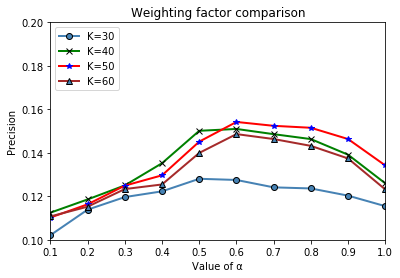

In [24]:
#Visualiztaion
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,6))
plt.axis([0.1,1, 0.1,0.2])
x = alpha
plt.plot(x, # x轴数据
         pre_list1, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue', # 点的填充色
         label = 'K=30') # 添加标签
plt.plot(x, # x轴数据
         pre_list2, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'green', # 折线颜色
         marker = 'x', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='#ff9999', # 点的填充色
         label = 'K=40') # 添加标签
plt.plot(x, # x轴数据
         pre_list3, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'red', # 折线颜色
         marker = '*', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='blue', # 点的边框色
         markerfacecolor='blue', # 点的填充色
         label = 'K=50') # 添加标签
plt.plot(x, # x轴数据
         pre_list4, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'brown', # 折线颜色
         marker = '^', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue', # 点的填充色
         label = 'K=60') # 添加标签
plt.legend(loc=2)
plt.title('Weighting factor comparison')
plt.xlabel('Value of α')
plt.ylabel('Precision')
plt.savefig('weight.png',dpi=100)
plt.show()

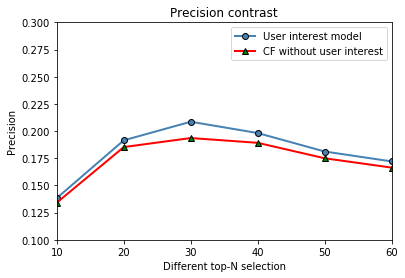

In [28]:
#n=10-60
n_list = [10,20,30,40,50,60]
test_1=[]
test_2=[]
for n in n_list:
    test_1.append(res_test(0.6, 50, n))
for n in n_list:
    test_2.append(res_test(1, 50, n))
plt.cla()
xp=n_list
plt.axis([10,60, 0.1,0.3])
plt.plot(xp, # x轴数据
         test_1, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue', # 点的填充色
         label = 'User interest model') # 添加标签
plt.plot(xp, # x轴数据
         test_2, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'red', # 折线颜色
         marker = '^', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='green', # 点的填充色
         label = 'CF without user interest') # 添加标签
plt.legend()
plt.title('Precision contrast')
plt.xlabel('Different top-N selection')
plt.ylabel('Precision')
plt.savefig('t2.png',dpi=100)
plt.show()

In [34]:
def res_test_recall(a, k, n):
    all_rec_list = {}
    res_id=[]
    res_movie=[]
    n=n-1
    for i in user_id_list:
        pre=[]
        record = test_data[test_data['user_id']==i]
        record_train = train_data[train_data['user_id']==1]
        m_i = list(record_train['movie_id'])
        movies = list(record['movie_id'])
        movies = [w for w in movies if w not in m_i]
        for m in movies:
            pre.append(predict2(i, m, a, k))
        rec_list = dict(zip(movies, pre))
        rec_list_sort = sorted(rec_list.items(), key=lambda d:d[1], reverse = True)
        result = list(dict(rec_list_sort).keys())
        result_top = result[:n]
        res_id.append(i)
        res_movie.append(result_top)
    all_rec_list=dict(zip(res_id, res_movie))
    recall = []
    for u,m in all_rec_list.items():
        recall.append(get_recall(m, u))
    f_recall=sum(precision)/len(user_id_list)
    return f_recall
n_list = [10,20,30,40,50,60]
test_r1=[]
test_r2=[]
for n in n_list:
    test_r1.append(res_test_recall(0.6, 50, n))
for n in n_list:
    test_r2.append(res_test_recall(1, 50, n))

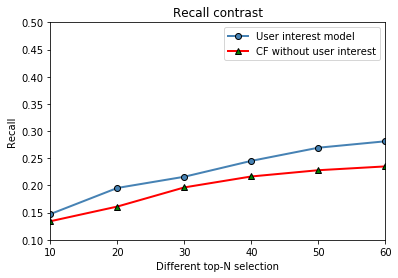

In [29]:
plt.cla()
xr=n_list
plt.axis([10,60, 0.1,0.5])
plt.plot(xr, # x轴数据
         test_r1, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue', # 点的填充色
         label = 'User interest model') # 添加标签
plt.plot(xr, # x轴数据
         test_r2, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'red', # 折线颜色
         marker = '^', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='green', # 点的填充色
         label = 'CF without user interest') # 添加标签
plt.legend()
plt.title('Recall contrast')
plt.xlabel('Different top-N selection')
plt.ylabel('Recall')
plt.savefig('t3.png',dpi=100)
plt.show()

In [29]:
test_data[test_data['user_id']==2]

,user_id,movie_id,rating,timestamp,title,genres
7135,2,537,4.0,835356199,Sirens (1994),Drama
7145,2,539,3.0,835355767,Sleepless in Seattle (1993),Comedy|Drama|Romance
7270,2,550,3.0,835356109,Threesome (1994),Comedy|Romance
7281,2,551,5.0,835355767,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
7371,2,552,3.0,835355860,"Three Musketeers, The (1993)",Action|Adventure|Comedy|Romance
7421,2,585,5.0,835355817,"Brady Bunch Movie, The (1995)",Comedy
7462,2,586,3.0,835355790,Home Alone (1990),Children|Comedy
7591,2,587,3.0,835355779,Ghost (1990),Comedy|Drama|Fantasy|Romance|Thriller
7717,2,588,3.0,835355441,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
7932,2,589,5.0,835355697,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [ ]:
#user-item-time
item_time = pd.DataFrame(np.zeros((len(user_id_list), len(movie_id_list))), index=user_id_list, columns=movie_id_list)    
for i in user_id_list:
    record = data[data['user_id']==i]
    time = list(record['timestamp'])
    movie = list(record['movie_id'])
    for t, m in zip(time, movie):
        item_time.loc[i, m] = t/60

In [ ]:
#Time factor considering

import math
def get_rem(t):
    k=1.84
    c=1.25
    j = 100*k/(log(t, 10)**c+1.84)
    return j

#preference for each attr
def get_fav_value(user_id, attr, d):
    record = data[data['user_id']==user_id]
    movie_list = list(record['movie_id'])
    times = list(record['timestamp'])
    t_l = max(times) #当作当前时间
    it = []
    days_30 = 2592000
    for m in movie_list:
        rate = record[record['movie_id']==m]['rating']
        iak = movie_attr.loc[m, attr]
        time = item_time.loc[user_id, m]
        if t_l-time<=day_30*d:
            time = get_rem(time)
        else:
            time = 0
        mult = float(rate)*float(iak)*float(time)
        it.append(mult)
    res = sum(it)
    return res

def get_total_fav(user_id, d):
    res = []
    for att in film_type:
        res.append(get_fav_value(user_id, att, d))
    return sum(res)
#preference value
def pref_para(user_id, attr, d):
    p = get_fav_value(user_id, attr, d)/get_total_fav(user_id, d)
    return p

#user interest
def user_interest(user_id, movie_id, d):
    movie = data[data['movie_id']==movie_id]
    attr = list(movie['genres'])[0].split('|')
    interest = []
    for a in attr:
        p = pref_para(user_id, a, d)
        interest.append(p)
    return sum(interest)

#prediction
def predict2(user_id, movie_id, beta, k, d):
    p1 = predict(user_id, movie_id, k)
    p2 = user_interest(user_id, movie_id, d)
    #print(p1)
    #print(p2)
    pred = beta * p1+ (1-beta) * p2
    return pred
    

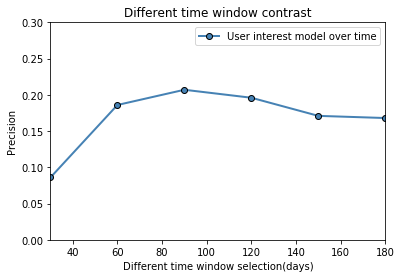

In [35]:
#time test
def res_test_time(a, k, n, d):
    all_rec_list = {}
    res_id=[]
    res_movie=[]
    n=n-1
    for i in user_id_list:
        print(i)
        pre=[]
        record = test_data[test_data['user_id']==i]
        record_train = train_data[train_data['user_id']==1]
        m_i = list(record_train['movie_id'])
        movies = list(record['movie_id'])
        movies = [w for w in movies if w not in m_i]
        for m in movies:
            pre.append(predict2(i, m, a, k, d))
        rec_list = dict(zip(movies, pre))
        rec_list_sort = sorted(rec_list.items(), key=lambda d:d[1], reverse = True)
        result = list(dict(rec_list_sort).keys())
        result_top = result[:n]
        res_id.append(i)
        res_movie.append(result_top)
    all_rec_list=dict(zip(res_id, res_movie))
    precision = []
    for u,m in all_rec_list.items():
        precision.append(get_precison(m, u))
    f_precision=sum(precision)/len(user_id_list)
    return f_precision
#30days-180days
d_list=[1,2,3,4,5,6]
time_window=[]
for d in d_list:
    time_window.append(res_test_time(0.6, 50, 30, d))
plt.cla()
x=[30,60,90,120,150, 180]
plt.axis([30,180, 0,0.3])
plt.plot(x, # x轴数据
         time_window, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue', # 点的填充色
         label = 'User interest model over time') # 添加标签
plt.legend()
plt.title('Different time window contrast')
plt.xlabel('Different time window selection(days)')
plt.ylabel('Precision')
plt.savefig('days.png',dpi=100)
plt.show()

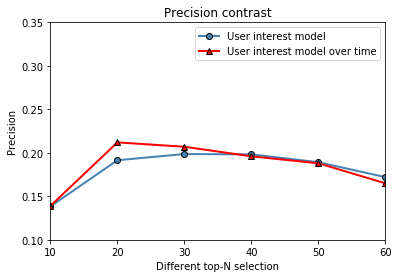

In [38]:
n_list=[10,20,30,40,50,60]
time_pre=[]
for n in n_list:
    time_pre.append(res_test_time(0.6, 50, n, 3))
plt.cla()
x = n_list
plt.axis([10,60, 0.1,0.3])
plt.plot(x, # x轴数据
         test_1, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue', # 点的填充色
         label = 'User interest model') # 添加标签
plt.plot(xp, # x轴数据
         time_pre, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'red', # 折线颜色
         marker = '^', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='green', # 点的填充色
         label = 'CF without user interest') # 添加标签
plt.legend()
plt.title('Precision contrast')
plt.xlabel('Different top-N selection')
plt.ylabel('Precision')
plt.savefig('t2.png',dpi=100)
plt.show()

In [ ]:
def res_test_time_recall(a, k, n, d):
    all_rec_list = {}
    res_id=[]
    res_movie=[]
    n=n-1
    for i in user_id_list:
        print(i)
        pre=[]
        record = test_data[test_data['user_id']==i]
        record_train = train_data[train_data['user_id']==1]
        m_i = list(record_train['movie_id'])
        movies = list(record['movie_id'])
        movies = [w for w in movies if w not in m_i]
        for m in movies:
            pre.append(predict2(i, m, a, k, d))
        rec_list = dict(zip(movies, pre))
        rec_list_sort = sorted(rec_list.items(), key=lambda d:d[1], reverse = True)
        result = list(dict(rec_list_sort).keys())
        result_top = result[:n]
        res_id.append(i)
        res_movie.append(result_top)
    all_rec_list=dict(zip(res_id, res_movie))
    recall = []
    for u,m in all_rec_list.items():
        recall.append(get_recall(m, u))
    f_recall=sum(recall)/len(user_id_list)
    return f_recall
n_list=[10,20,30,40,50,60]
time_recall=[]
for n in n_list:
    time_recall.append(res_test_time(0.6, 50, n, 3))
    

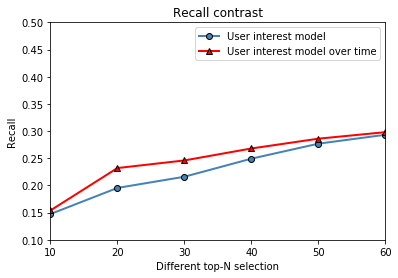

In [39]:
plt.cla()
plt.axis([10,60, 0.1,0.5])
x=n_list
plt.plot(x, # x轴数据
         test_r1, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue', # 点的填充色
         label = 'User interest model') # 添加标签
plt.plot(x, # x轴数据
         time_recall, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'red', # 折线颜色
         marker = '^', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='red', # 点的填充色
         label = 'User interest model over time') # 添加标签
plt.legend()
plt.title('Recall contrast')
plt.xlabel('Different top-N selection')
plt.ylabel('Recall')
plt.savefig('t5.png',dpi=100)
plt.show()

In [20]:
import time
tl = time.localtime(1476622832)
format_time1 = '1970-01-31 00:00:00'
format_time2 = '2016-08-01 00:00:00'
format_time3 = '2016-08-31 00:00:00'
ts1 = time.strptime(format_time1, "%Y-%m-%d %H:%M:%S")
ts2 = time.strptime(format_time2, "%Y-%m-%d %H:%M:%S")
ts3 = time.strptime(format_time3, "%Y-%m-%d %H:%M:%S")
st1 = time.mktime(ts1)
st2 = time.mktime(ts2)
st3 = time.mktime(ts3)
t_l = 1476727044   #现在时间
days_30 = 2592000
tt = 1476622832
t_l-tt

104212